In [9]:
import librosa
import numpy as np
import soundfile as sf
from tqdm import tqdm
import os

directory = "C:/Users/ASUS/OneDrive - BUET/Desktop/SR_DSP/TestData/ID_33"
c =0
for filename in os.listdir(directory):
    c=c+1
    x, sr = librosa.load(directory+"/"+str(filename),duration=1,sr=44100)
    print(type(x))
    x = np.array(x)
    x.resize(44100)
    sf.write("C:/Users/ASUS/OneDrive - BUET/Desktop/SR_DSP/TestData/ID_33/"+"ID_33_"+str(c)+".wav", x, sr, 'PCM_16')
    print(x.shape)

<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'numpy.ndarray'>
(44100,)
<class 'nu

In [42]:
import IPython.display as ipd
ipd.Audio(audio_path)

In [16]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


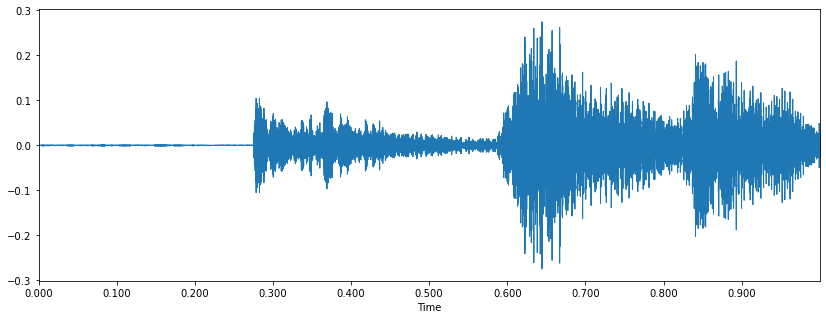

In [23]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

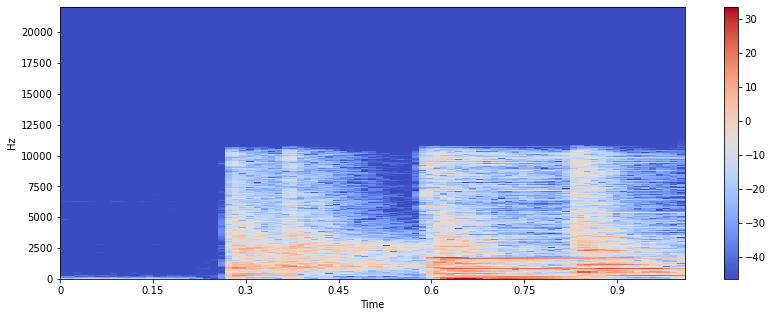

In [24]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

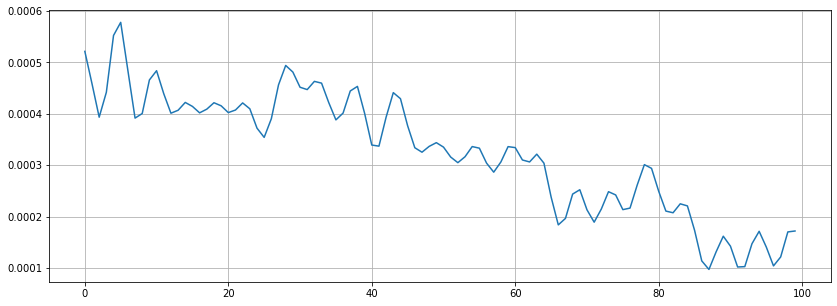

In [25]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [26]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(sum(zero_crossings))

2579


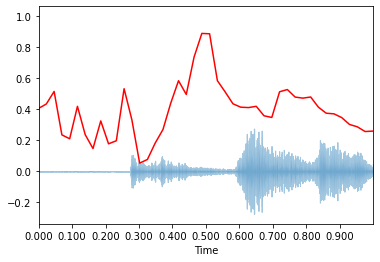

In [27]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

<class 'numpy.ndarray'>
(44100,)



(20, 87)


NameError: name 'plt' is not defined

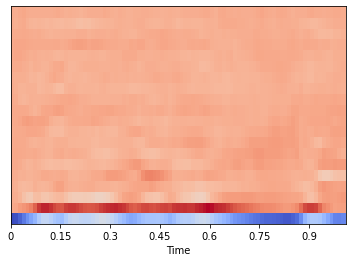

In [1]:
import librosa
import librosa.display
x, sr = librosa.load("Prova_part.wav",duration=1,sr=44100)
print(type(x))
print(x.shape)
x = x.reshape(1,44100)
x = x.reshape(44100,)
print("\n\n")
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()

In [29]:
print(mfccs[:,0])
# Date te NOISE add kora
# Distort sound
# Code book 

[-675.2042      22.022923    20.888865    20.684193    20.11224
   18.352676    16.727005    15.998713    15.051651    13.110302
   11.265101    10.56862      9.9776       8.349774     6.888791
    6.621571     6.0270123    4.232746     2.9251323    2.8390822]


Wall time: 635 ms


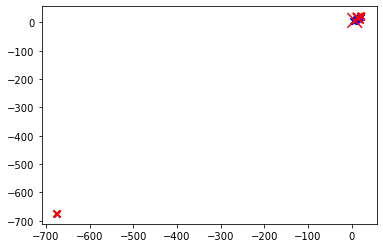

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.05, 0.0, 0.0, 0.05, 0.2, 0.25, 0.4]




In [30]:
import matplotlib.pyplot as plt

import random
import lbg # Linday Buzo Gay Algorithm - vector quantization

%matplotlib inline

SIZE_CODEBOOK = 10


# display population as blue crosses
plt.scatter([p[0] for p in mfccs ], [p[1] for p in mfccs], marker='x', color='blue')

# generate codebook
%time cb, cb_abs_w, cb_rel_w = lbg.generate_codebook(mfccs, SIZE_CODEBOOK)


# display codebook as red filled circles
# codevectors with higher weight (more points near them) get bigger radius
plt.scatter([p[0] for p in cb], [p[1] for p in cb], s=[((w+1) ** 5) * 40 for w in cb_rel_w], marker='x', color='red')

plt.show()
print(cb_rel_w)
print('\n')


In [ ]:
# import sounddevice as sd
# from scipy.io.wavfile import write
# import time

# fs = 44100  # Sample rate
# seconds = 3  # Duration of recording
# print("Start Speaking Now\n")
# time.sleep(0.5)
# print('Listening....Speak Now')
# myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
# sd.wait()  # Wait until recording is finished
# print("Done Recording\n")

# test1 = np.array(myrecording[20000:20000+44100])
# test2 = np.array(myrecording[0:44100])

# test1 = test1.reshape(1,44100)
# test1 = test1[np.newaxis,:]
# test2 = test2.reshape(1,44100)
# test2 = test2[np.newaxis,:]

# y1 = model.predict(test1)
# y1 = y1.astype(int)
# print(y1)
# y2 = model.predict(test2)
# y2 = y2.astype(int)
# print(y2)

# if np.sum(y1)>0:

#         index1 = np.where(y1 == 1)
         
#         index1 = np.array(index1)
#         pos = index1[1][0]
#         print(name_list[pos])
       
# elif np.sum(y2)>0:
#         index1 = np.where(y2 == 1)

#         index1 = np.array(index1)
#         pos = index1[1][0]
#         print(name_list[pos])
        
# else:
#         print("Input again")



# z,sr = librosa.load("C:/Users/ASUS/OneDrive - BUET/Desktop/SR_DSP/TestData/ID_59/ID_59_3.wav",duration=1,sr=44100)
# z = np.array(z,dtype=object)
# z = z.reshape(1,44100)
# z = z[np.newaxis,:]
# y = model.predict(z)
# y = y.astype(int)
# print(y)
# idx = np.where(y == 1.0)
# print(name_list[int(idx[1])])
